In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error   #MAE
from sklearn.metrics import mean_squared_error as mse   #MSE

def parser(x):
    return datetime.strptime(x,'%Y-%m')

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())  #RMSE

def RMSLE(predict, target):                   #Root Mean Squared Logarithmic Error
    total = 0 
    for k in range(len(predict)):
        LPred= np.log1p(predict[k]+1)
        LTarg = np.log1p(target[k] + 1)
        if not (math.isnan(LPred)) and  not (math.isnan(LTarg)): 
            total = total + ((LPred-LTarg) **2)
        
    total = total / len(predict)        
    return np.sqrt(total)

def mean_absolute_percentage_error(y_true, y_pred): #MAPE
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))  #Symmetric Mean Absolute Percentage Error (SMAPE)

sales = pd.read_csv('/content/INFY.NS.csv',index_col=0, parse_dates=[0])

In [2]:
sales.head()

,Price
Date,
2010-03-08,331.625000
2010-03-09,331.256012
2010-03-10,334.362000
2010-03-11,333.125000
2010-03-12,337.487000


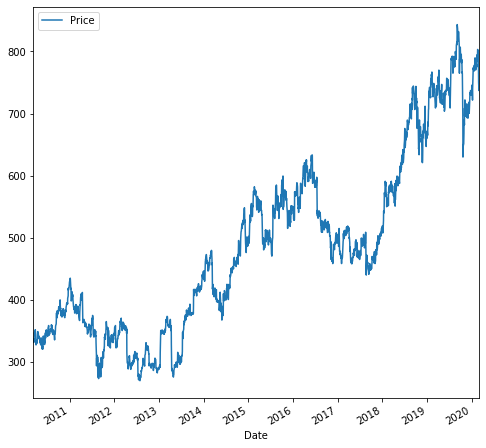

In [3]:
sales.plot(figsize=(8,8))
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

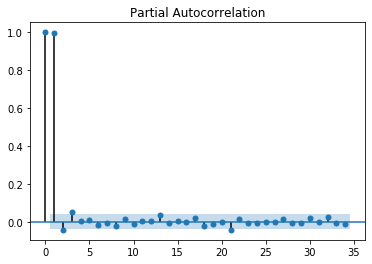

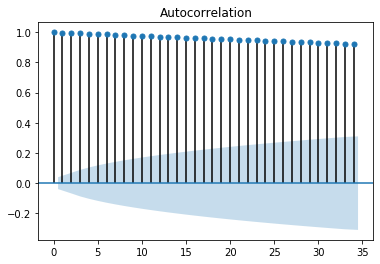

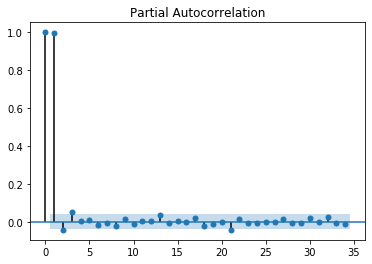

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(sales)

In [5]:
X = sales.values
print(X)
print(len(sales.Price))
train = X[0:len(sales.Price)] # No. of days data recorded
test = X[1006:]  # 20% of data as test data
predictions = []

print()

[[331.625   ]
 [331.256012]
 [334.362   ]
 ...
 [753.900024]
 [763.75    ]
 [741.      ]]
2473



In [0]:
train, test = sales[0:int(len(sales)*0.8)], sales[int(len(sales)*0.8):]
predictions = []

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [8]:
import itertools
p=d=q=range(0,3)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [9]:
import warnings
c=100000
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
        a=model_arima_fit.aic
        if a<c:
            c=a;
            p=param
    except:
        continue
print(c)
print(p)

(0, 0, 0) 23575.837926128646
(0, 0, 1) 21014.574375449716
(0, 0, 2) 19104.985213580403
(0, 1, 0) 13319.312357181461
(0, 1, 1) 13321.281997766971
(0, 1, 2) 13316.472481152377
(0, 2, 0) 14690.47953292744
(0, 2, 1) 13323.094605545231
(1, 0, 0) 13331.731607109268
(1, 0, 1) 13333.722676496094
(1, 0, 2) 13329.299001757649
(1, 1, 0) 13321.285578661973
(1, 2, 0) 14193.636317030501
(1, 2, 1) 13325.07425850528
(1, 2, 2) 13321.177271622135
(2, 0, 0) 13333.72370606244
(2, 0, 1) 13329.756806428313
(2, 0, 2) 13331.25383416635
(2, 1, 0) 13316.392740588355
(2, 1, 1) 13318.388197739561
(2, 1, 2) 13320.350128804888
(2, 2, 0) 13918.298763880965
(2, 2, 1) 13320.29143493513
(2, 2, 2) 13322.281742927193
13316.392740588355
(2, 1, 0)


In [0]:
def func1(x):
        p=x[0]
        d=x[1]
        q=x[2]
        model_arima = ARIMA(train,order=(p,d,q))
        model_arima_fit = model_arima.fit(start_ar_lags=13)
        print(x,model_arima_fit.aic)
        return model_arima_fit.aic

In [13]:

import random
import math

#--- COST FUNCTION ------------------------------------------------------------+

# function we are attempting to optimize (minimize)


#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[1,1,2]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==100000:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant
 
        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=int(self.position_i[i]+self.velocity_i[i])

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]
            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions
   
        num_dimensions=len(x0)
        err_best_g=100000                  # best error for group
        pos_best_g=[]                   # best position for group

        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        # begin optimization loop
        i=0
        while i < maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i < err_best_g or err_best_g == 100000:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
        # print final results
        print ('FINAL:')
        print (pos_best_g)
        print (err_best_g)

if __name__ == "__PSO__":
    main()

#--- RUN ----------------------------------------------------------------------+

initial=[3,2,0]               # initial starting location [x1,x2...]
bounds=[(0,10),(0,2),(0,10)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
PSO(func1,initial,bounds,num_particles=3,maxiter=50)

[3, 2, 0] 13773.631236021096
[3, 2, 0] 13773.631236021096
[3, 2, 0] 13773.631236021096
[2, 0, 0] 13333.72370606244
[1, 2, 2] 13321.17706018424
[1, 1, 1] 13317.414154314683
[0, 1, 3] 13318.443727543921
[0, 0, 2] 19104.985213580403
[0, 0, 1] 21014.574375449716
[0, 1, 4] 13320.349341661422
[1, 1, 1] 13317.414154314683
[1, 1, 1] 13317.414154314683
[1, 1, 0] 13321.285578661973
[1, 1, 1] 13317.414154314683
[1, 1, 2] 13318.44868475201
[1, 1, 0] 13321.285578661973
[1, 1, 1] 13317.414154314683
[1, 1, 1] 13317.414154314683
[1, 1, 2] 13318.44868475201
[1, 1, 1] 13317.414154314683
[1, 1, 1] 13317.414154314683
[1, 1, 1] 13317.414154314683
[1, 1, 2] 13318.44868475201
[1, 1, 1] 13317.414154314683
[1, 1, 1] 13317.414154314683
[1, 1, 2] 13318.44868475201
[1, 1, 2] 13318.44868475201
[1, 1, 2] 13318.44868475201
[1, 1, 2] 13318.44868475201
[1, 1, 0] 13321.285578661973
[1, 1, 1] 13317.414154314683
[1, 1, 0] 13321.285578661973
[1, 1, 2] 13318.44868475201
[1, 1, 1] 13317.414154314683
[1, 1, 1] 13317.41415431

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [15]:
df = pd.read_csv("/content/INFY.NS.csv").fillna(0)
df

,Date,Price
0,2010-03-08,331.625000
1,2010-03-09,331.256012
2,2010-03-10,334.362000
3,2010-03-11,333.125000
4,2010-03-12,337.487000
...,...,...
2468,2020-03-02,737.000000
2469,2020-03-03,755.000000
2470,2020-03-04,753.900024
2471,2020-03-05,763.750000


Text(0.5, 1.0, 'Apple Inc. Autocorrelation plot')

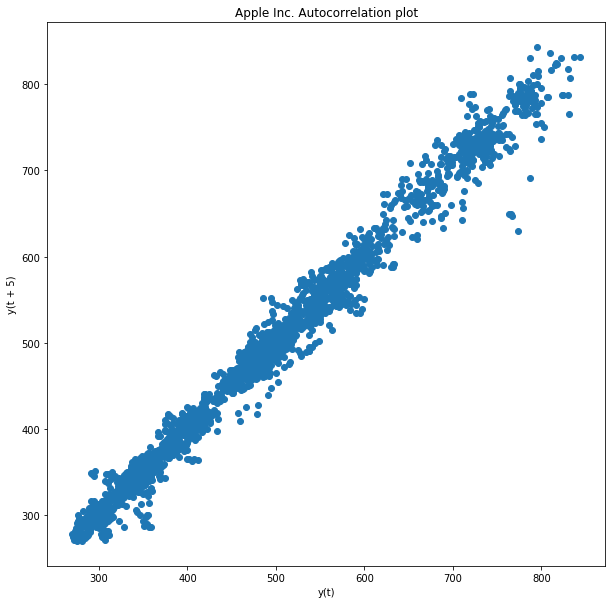

In [16]:
plt.figure(figsize=(10,10))
lag_plot(df['Price'], lag=5)
plt.title('Apple Inc. Autocorrelation plot')

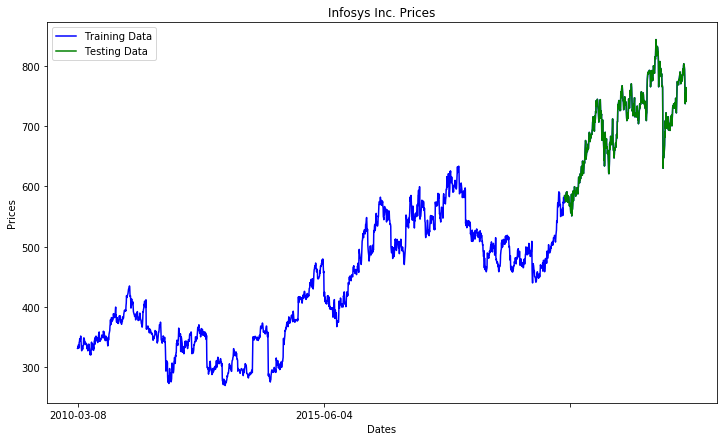

In [17]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Infosys Inc. Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Price'], 'blue', label='Training Data')
plt.plot(test_data['Price'], 'green', label='Testing Data')
plt.xticks(np.arange(0,2518, 1000), df['Date'][0:2518:1300])
plt.legend()

In [0]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))  #Symmetric Mean Absolute Percentage Error (SMAPE)

In [19]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

train_ar = train_data['Price'].values
test_ar = test_data['Price'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
resid_test = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]

    resid_test.append(test_ar[t] - output[0])

    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
test_resid = []
for i in resid_test:
    test_resid.append(i[0])

# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)

<class 'list'>
predicted=574.103400, expected=584.799988
predicted=584.815615, expected=580.375000
predicted=579.874180, expected=581.275024
predicted=581.667303, expected=577.500000
predicted=577.595329, expected=574.500000
predicted=574.866035, expected=581.174988
predicted=581.456965, expected=588.000000
predicted=587.712460, expected=590.099976
predicted=589.824993, expected=590.000000
predicted=590.013975, expected=590.000000
predicted=590.144116, expected=591.000000
predicted=591.134785, expected=582.000000
predicted=582.109903, expected=574.299988
predicted=574.989039, expected=585.000000
predicted=585.557153, expected=582.250000
predicted=581.752860, expected=573.500000
predicted=573.833081, expected=583.450012
predicted=584.070899, expected=580.000000
predicted=579.545357, expected=575.375000
predicted=575.741075, expected=570.500000
predicted=570.934590, expected=567.349976
predicted=567.787997, expected=572.000000
predicted=572.297718, expected=569.775024
predicted=569.62915

['finalized_model.sav']

In [20]:
error = mean_squared_error(test_ar, predictions)
print('MSE: %.3f' % error)

error = mean_absolute_error(test_ar, predictions)
print('MAE: %.3f' % error)

error = rmse(test_ar, predictions)
print('RMSE: %.3f' % error)

error = RMSLE(test_ar, predictions)
print('RMSLE: %.3f' % error)

error = mean_absolute_percentage_error(test_ar, predictions)
print('MAPE: %.3f' % error)

error2 = smape_kun(test_ar, predictions)
print('SMAPE: %.3f' % error2)


MSE: 117.191
MAE: 7.670
RMSE: 92.644
RMSLE: 0.015
MAPE: 0.107
SMAPE: 10.655


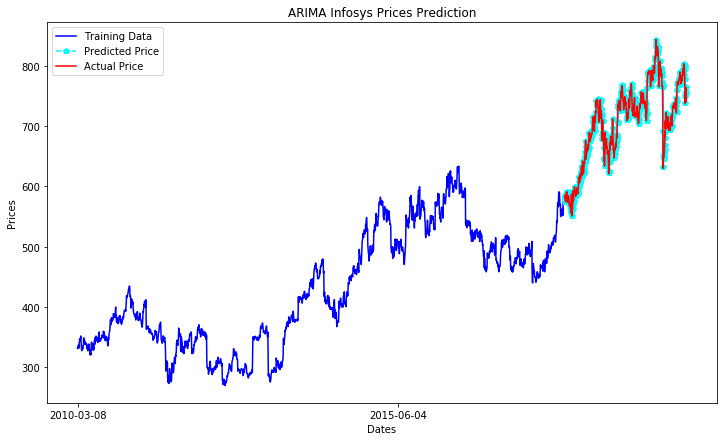

In [21]:
plt.figure(figsize=(12,7))
plt.plot(df['Price'], color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='cyan', marker='p', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Price'], color='red', label='Actual Price')

plt.title('ARIMA Infosys Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,2518, 1300), df['Date'][0:2518:1300])
plt.legend()

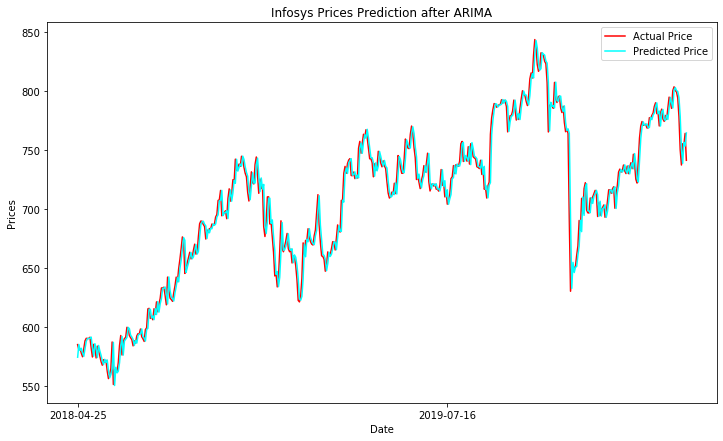

In [22]:
plt.figure(figsize=(12,7))
Y = pd.DataFrame(test_ar)
pred = pd.DataFrame(predictions)
plt.plot(Y, color= 'red', label='Actual Price')
plt.plot(pred , color = 'cyan', label='Predicted Price')
plt.title('Infosys Prices Prediction after ARIMA')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,500, 300), df['Date'][2014:2518:300])
plt.legend()

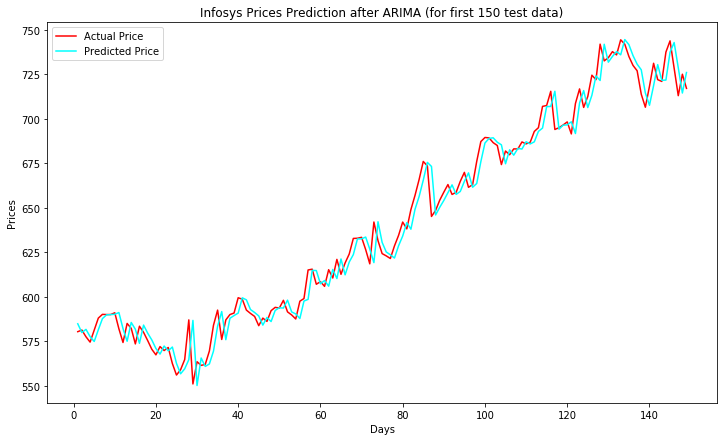

In [23]:
plt.figure(figsize=(12,7))
Y = pd.DataFrame(test_ar)[1:150]
pred = pd.DataFrame(predictions)[1:150]
plt.plot(Y, color= 'red', label='Actual Price')
plt.plot(pred , color = 'cyan', label='Predicted Price')
plt.title('Infosys Prices Prediction after ARIMA (for first 150 test data)')
plt.xlabel('Days')
plt.ylabel('Prices')
#p.plot()
#plt.xticks(np.arange(0,150, 300), df['Date'][4000:5029:300])
plt.legend()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2471
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -8613.597
Method:                       css-mle   S.D. of innovations              7.901
Date:                Thu, 12 Mar 2020   AIC                          17235.194
Time:                        16:58:30   BIC                          17258.444
Sample:                             1   HQIC                         17243.640
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1747      0.153      1.140      0.255      -0.126       0.475
ar.L1.D.y      0.0171      0.020      0.852      0.394      -0.022       0.056
ar.L2.D.y     -0.0538      0.020     -2.677      0.0

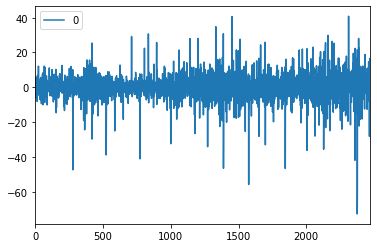

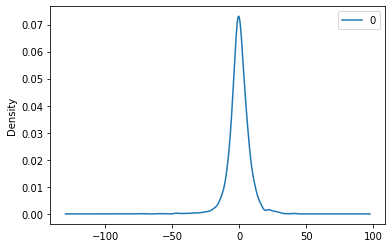

                 0
count  2471.000000
mean      0.000056
std       7.902172
min     -72.732228
25%      -3.549119
50%      -0.062744
75%       3.799087
max      40.828604
Residuals:



,0
0,-0.543701
1,2.940110
2,-1.491143
3,4.369089
4,-6.009339
...,...
2466,-28.179560
2467,-13.559369
2468,16.535797
2469,-2.288383


In [51]:
"""
Residual Diagnostics
"""

print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
print('Residuals:\n')
out = pd.DataFrame(model_fit.resid, columns=['out_residual']).to_csv('out_infy.csv')
display(residuals)

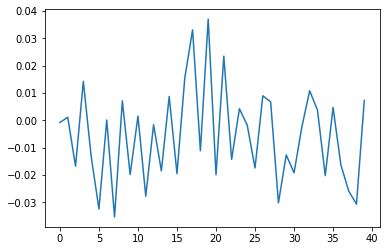

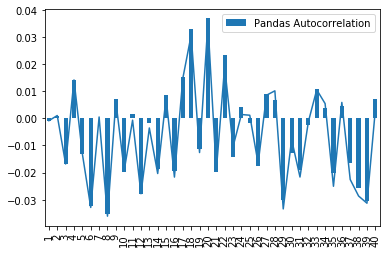

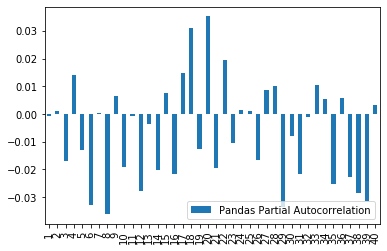

In [52]:
from statsmodels.tsa.stattools import acf, pacf
acf_2 = acf(model_fit.resid)[1:100]
plt.plot(acf_2)
test_df = pd.DataFrame([acf_2]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
pacf_2 = pacf(model_fit.resid)[1:100]
plt.plot(pacf_2)
plt.show()
test_df = pd.DataFrame([pacf_2]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')

In [0]:
#Output residuals to DBN 

In [0]:
from dbn.tensorflow import SupervisedDBNClassification
from dbn.tensorflow import SupervisedDBNRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.classification import accuracy_score

In [0]:
digits = pd.read_csv("/content/out_infy.csv")

X = np.array(digits.drop(["out_residual"], axis=1))
Y = np.array(digits["out_residual"])

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train)

[[2149]
 [  32]
 [2128]
 ...
 [ 495]
 [  40]
 [1157]]


In [0]:
from sklearn.preprocessing import StandardScaler
# Data scaling
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)

In [70]:

from __future__ import division
import random
import math
from sklearn.metrics import r2_score
from sklearn.metrics.regression import r2_score, mean_squared_error
#--- COST FUNCTION ------------------------------------------------------------+

# function we are attempting to optimize (minimize)
#--- MAIN ---------------------------------------------------------------------+
def func1(X,X_test):
    
    regressor = SupervisedDBNRegression(hidden_layers_structure=X,
                                    learning_rate_rbm=0.01,
                                    learning_rate=0.01,
                                    n_epochs_rbm=1,
                                    n_iter_backprop=10,
                                    batch_size=16,
                                    activation_function='relu')
    regressor.fit(X_train, Y_train)

    X_test = min_max_scaler.transform(X_test)
    Y_pred = regressor.predict(X_test)
    error = mean_squared_error(Y_test, Y_pred)
    return error

class Particle:
    digits = pd.read_csv("out_infy.csv")
    X = np.array(digits.drop(["out_residual"], axis=1))
    Y = np.array(digits["out_residual"])
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=10000          # best error individual
        self.err_i=100000               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i,X_test)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==1000000:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=3        # cognative constant
        c2=2        # social constant
 
        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()
            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=int(self.position_i[i]+self.velocity_i[i])
            print(self.position_i[i])
            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions
   
        num_dimensions=len(x0)
        err_best_g=10000                 # best error for group
        pos_best_g=[]                   # best position for group

        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        # begin optimization loop
        i=0
        while i < maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i < err_best_g or err_best_g == 10000:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
                print(pos_best_g)    
                print(err_best_g)
            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1

        # print final results
        print ('FINAL:')
        print (pos_best_g)
        print (err_best_g)

if __name__ == "__PSO__":
    main()

#--- RUN ----------------------------------------------------------------------+

initial=[512]               # initial starting location [x1,x2...]
bounds=[(1,1000)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
PSO(func1,initial,bounds,num_particles=1,maxiter=10)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 0.017547
[END] Pre-training step
[START] Fine tuning step:
>> Epoch 0 finished 	ANN training loss 57.208397
>> Epoch 1 finished 	ANN training loss 55.724026
>> Epoch 2 finished 	ANN training loss 55.834862
>> Epoch 3 finished 	ANN training loss 55.740543
>> Epoch 4 finished 	ANN training loss 55.711330
>> Epoch 5 finished 	ANN training loss 55.771858
>> Epoch 6 finished 	ANN training loss 55.709782
>> Epoch 7 finished 	ANN training loss 55.711712
>> Epoch 8 finished 	ANN training loss 55.829895
>> Epoch 9 finished 	ANN training loss 55.723724
[END] Fine tuning step
[512]
89.20996692945894
512
[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 0.022794
[END] Pre-training step
[START] Fine tuning step:
>> Epoch 0 finished 	ANN training loss 55.771721
>> Epoch 1 finished 	ANN training loss 55.799065
>> Epoch 2 finished 	ANN training loss 55.784210
>> Epoch 3 finished 	ANN training loss 55.707634

In [64]:
regressor = SupervisedDBNRegression(hidden_layers_structure=[512],
                                    learning_rate_rbm=0.01,
                                    learning_rate=0.01,
                                    n_epochs_rbm=5,
                                    n_iter_backprop=300,
                                    batch_size=16,
                                    activation_function='relu')
regressor.fit(X_train, Y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 0.021714
>> Epoch 2 finished 	RBM Reconstruction error 0.009912
>> Epoch 3 finished 	RBM Reconstruction error 0.004367
>> Epoch 4 finished 	RBM Reconstruction error 0.003374
>> Epoch 5 finished 	RBM Reconstruction error 0.002480
[END] Pre-training step
[START] Fine tuning step:
>> Epoch 0 finished 	ANN training loss 55.719097
>> Epoch 1 finished 	ANN training loss 55.786541
>> Epoch 2 finished 	ANN training loss 55.725132
>> Epoch 3 finished 	ANN training loss 55.762051
>> Epoch 4 finished 	ANN training loss 55.813839
>> Epoch 5 finished 	ANN training loss 55.735432
>> Epoch 6 finished 	ANN training loss 55.767643
>> Epoch 7 finished 	ANN training loss 55.731384
>> Epoch 8 finished 	ANN training loss 55.709541
>> Epoch 9 finished 	ANN training loss 55.717430
>> Epoch 10 finished 	ANN training loss 55.741364
>> Epoch 11 finished 	ANN training loss 55.766975
>> Epoch 12 finished 	ANN training loss 55.713352
>> Epoch

SupervisedDBNRegression(batch_size=16, dropout_p=0, l2_regularization=1.0,
                        learning_rate=0.01, n_iter_backprop=300, verbose=True)

In [65]:
# Test
from sklearn.metrics import r2_score
from sklearn.metrics.regression import r2_score, mean_squared_error
X_test = min_max_scaler.transform(X_test)
Y_pred = regressor.predict(X_test)
error = mean_squared_error(Y_test, Y_pred)
print('Testing Mean Squared Error: %.3f' % error)
#print(Y_test, Y_pred)

Testing Mean Squared Error: 89.213


In [66]:
# Test
X_test = min_max_scaler.transform(X_test)
Y_pred = regressor.predict(X_test)
print('Done.\nR-squared: %f\nMSE: %f' % (r2_score(Y_test, Y_pred), mean_squared_error(Y_test, Y_pred)))

Done.
R-squared: -0.000101
MSE: 89.213489


In [67]:
error = mean_squared_error(Y_test, Y_pred)
print('Output of DBN Test MSE: %.3f' % error)

error = mean_absolute_error(Y_test, Y_pred)
print('Output of DBN Test MAE: %.3f' % error)

error = rmse(Y_test, Y_pred)
print('Output of DBN Test RMSE: %.3f' % error)

error = RMSLE(Y_test, Y_pred)
print('Output of DBN Test RMSLE: %.3f' % error)

error = mean_absolute_percentage_error(Y_test, Y_pred)
print('Output of DBN Test MAPE: %.3f' % error)

error2 = smape_kun(Y_test, Y_pred)
print('Output of DBN Test SMAPE: %.3f' % error2)

Output of DBN Test MSE: 89.213
Output of DBN Test MAE: 5.918
Output of DBN Test RMSE: 9.445
Output of DBN Test RMSLE: 1.110
Output of DBN Test MAPE: 1.036
Output of DBN Test SMAPE: 194.163


In [0]:
prediction_dbn = regressor.predict(X_test)

In [69]:
pred_final =  predictions + prediction_dbn
error = mean_squared_error(test_ar,pred_final)
print('Hybrid Test MSE: %.3f' % error)

error = mean_absolute_error(test_ar, pred_final)
print('Hybrid Test MAE: %.3f' % error)

error = rmse(test_ar, pred_final)
print('Hybrid Test RMSE: %.3f' % error)

error = RMSLE(test_ar, pred_final)
print('Hybrid Test RMSLE: %.3f' % error)

error = mean_absolute_percentage_error(test_ar, pred_final)
print('Hybrid Test MAPE: %.3f' % error)

error2 = smape_kun(test_ar, pred_final)
print('Hybrid Test SMAPE: %.3f' % error2)

Hybrid Test MSE: 117.176
Hybrid Test MAE: 7.668
Hybrid Test RMSE: 92.644
Hybrid Test RMSLE: 0.015
Hybrid Test MAPE: 0.107
Hybrid Test SMAPE: 10.654


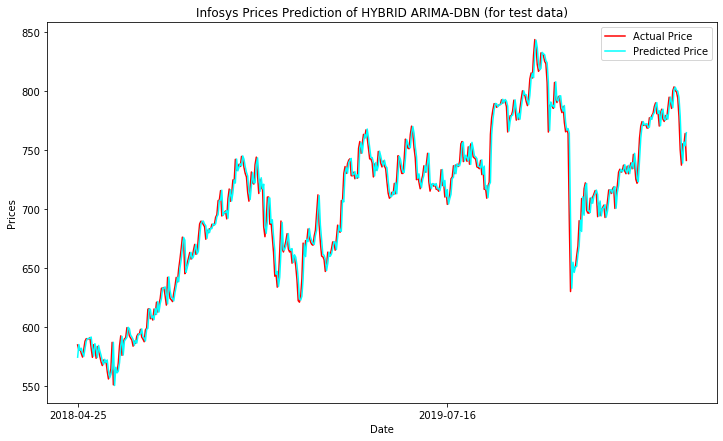

In [0]:
plt.figure(figsize=(12,7))
plt.xlabel('Date')
plt.ylabel('Prices')
Y = pd.DataFrame(test_ar)
pred = pd.DataFrame(pred_final)
plt.plot(Y, color= 'red', label='Actual Price')
plt.plot(pred , color = 'cyan', label='Predicted Price')
plt.xticks(np.arange(0,600, 300), df['Date'][2014:2518:300])
plt.title('Infosys Prices Prediction of HYBRID ARIMA-DBN (for test data)')
#p.plot()
plt.legend()

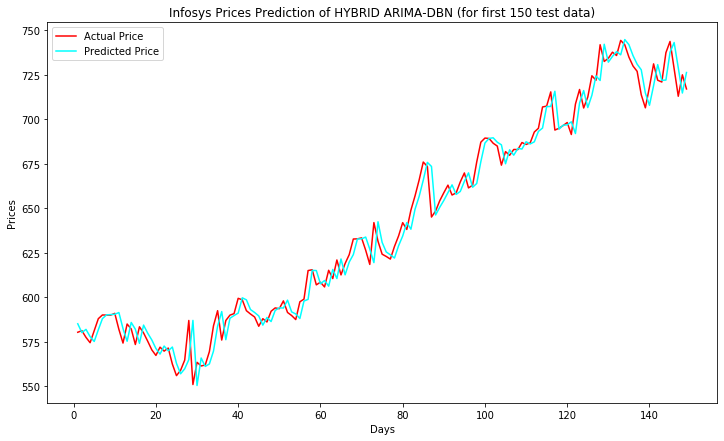

In [0]:
plt.figure(figsize=(12,7))
plt.xlabel('Days')
plt.ylabel('Prices')
Y = pd.DataFrame(test_ar)[1:150]
pred = pd.DataFrame(pred_final)[1:150]
plt.plot(Y, color= 'red', label='Actual Price')
plt.plot(pred , color = 'cyan', label='Predicted Price')
plt.title('Infosys Prices Prediction of HYBRID ARIMA-DBN (for first 150 test data)')
#p.plot()
plt.legend()